#Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the dataset

In [2]:
df=pd.read_csv('blinkit_data.csv')

In [3]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
df.tail(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [5]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


###Size of the dataset

In [6]:
df.shape

(8523, 12)

###Field Info

In [7]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [8]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


###Data cleaning

In [9]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [10]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat',
                                                         'low fat': 'Low Fat',
                                                         'reg': 'Regular'
                                                         })

In [11]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

#Business Requirements

##KPI's Requirements

In [12]:
# Total Sales
total_sales = df['Sales'].sum()

# Average Sales
avg_sales = df['Sales'].mean()

# No of Items sold
no_of_items_sold = df['Sales'].count()

# Average rating
avg_rating = df['Rating'].mean()

# Display

print(f'Total Sales: ${total_sales:,.1f}')
print(f'Average Sales: ${avg_sales:,.1f}')
print(f'No of Items sold: {no_of_items_sold:,}')
print(f'Average rating: {avg_rating:,.1f}')

Total Sales: $1,201,681.5
Average Sales: $141.0
No of Items sold: 8,523
Average rating: 4.0


#####These metrics show that the business has strong overall sales performance with a good average customer rating, indicating customer satisfaction and consistent product demand.

##Chart Requirement

###Total sales by Fat Content

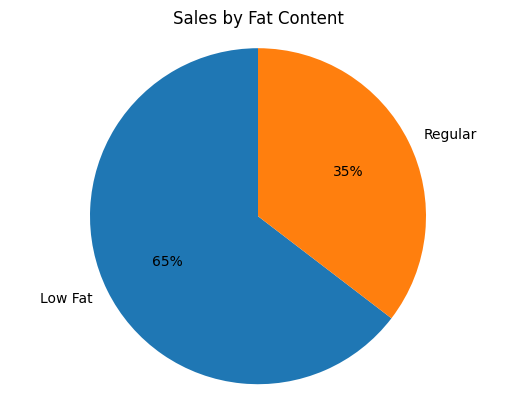

In [13]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat, labels=sales_by_fat.index,
        autopct= '%.0f%%',
        startangle=90)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()


#####From the visualization, Low Fat products contribute approximately 65% of the total sales, while Regular fat products account for around 35%.This indicates that customers prefer Low Fat products more than Regular fat products

###Total Sales by Item Type

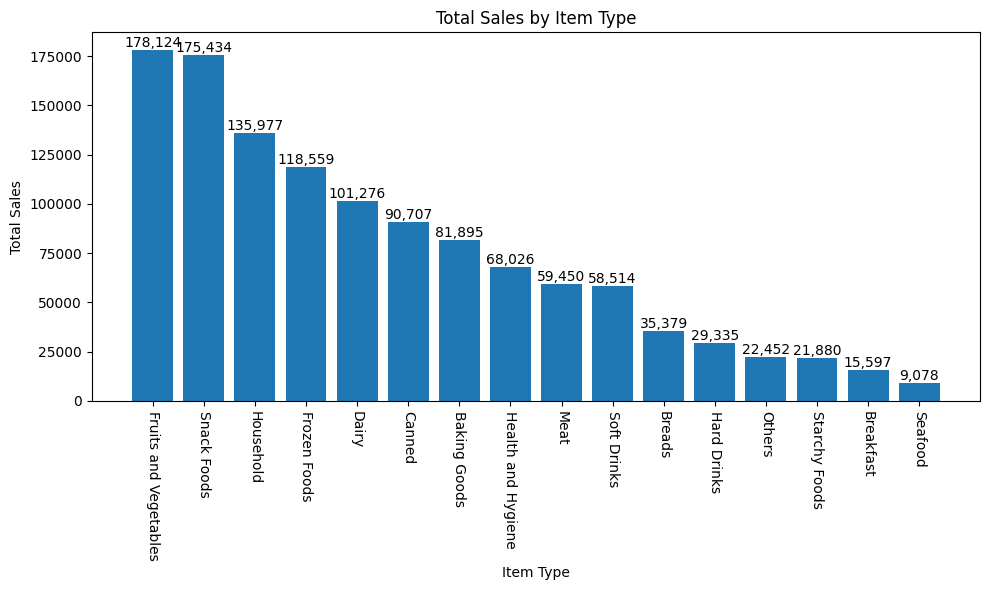

In [14]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             f'{bar.get_height():,.0f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


##### From the visualization, Fruits and Vegetables generated the highest sales (178,124.75), followed closely by Snack Foods (175,433.92) and Household items (135,976.53). These categories are the top contributors to overall revenue, indicating strong customer demand.
#####On the other hand, categories such as Seafood (9,078.00), Breakfast (15,596.70), and Starchy Foods (21,880.03) recorded the lowest sales, suggesting comparatively lower demand

###Fat Content by outlet for Total Sales

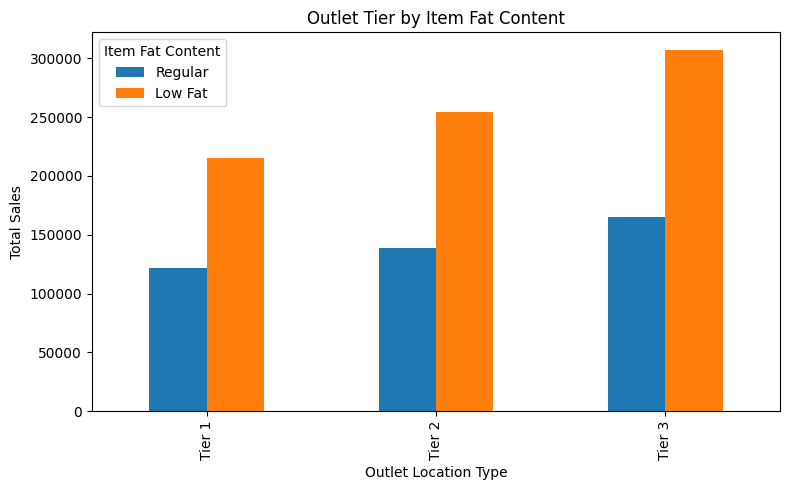

In [15]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped=grouped[['Regular', 'Low Fat']]

ax=grouped.plot(kind='bar', figsize=(8,5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

#####The graph shows that Low Fat products consistently generate higher sales than Regular fat products in all outlet tiers.Among the tiers, Tier 3 outlets have the highest overall sales, with Low Fat products contributing the most, followed by Tier 2 and Tier 1.

###Total Sales by Outlet Establishment

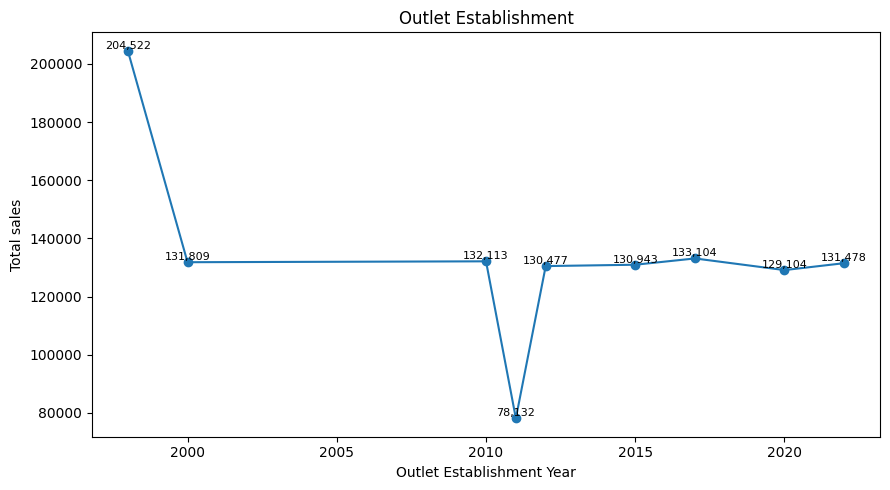

In [16]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
  plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#####From the line chart, the highest sales were recorded in 1998 (204,522), indicating that the oldest outlets generated the strongest revenue performance.
#####Sales remained relatively stable between 2000 and 2022, generally ranging between 129,000 and 133,000, which suggests consistent performance among outlets established during these years. However, there was a noticeable drop in 2011 (78,132), indicating weaker performance or fewer contributing outlets during that period.

###Sales by outlet size

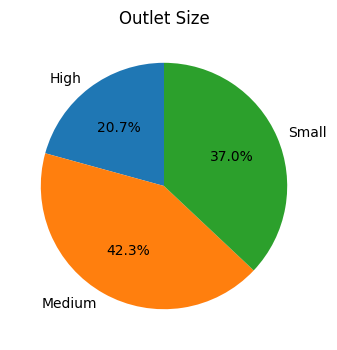

In [17]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4, 4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.show()

#####Here, Medium-sized outlets contribute the highest share of total sales (42.3%), followed by Small outlets (37.0%), while High-sized outlets contribute the lowest share (20.7%).

###Sales by Outlet Location

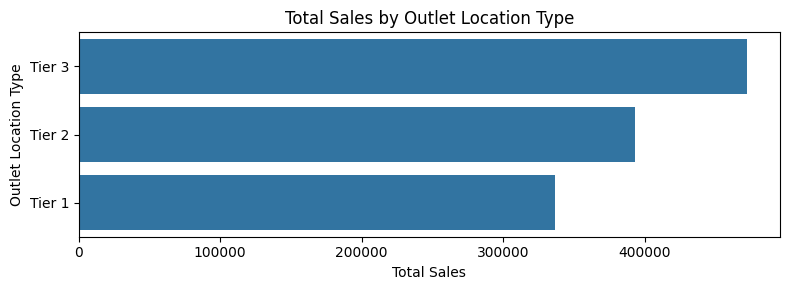

In [18]:
# Sales by Outlet Location

sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8, 3))  # Smaller height, enough width
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()  # Ensures layout fits without scroll
plt.show()


#####Here, Tier 3 outlets contribute the highest share of total sales, followed by Tier 2 outlets, while Tier 1 outlets contribute the lowest share, indicating that higher-tier locations dominate the overall sales distribution in the dataset.